In [1]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image 
import tensorflow.keras.backend as K
from numpy.linalg import norm
# Display
from IPython.display import Image as Image1
from IPython.display import display


import matplotlib.pyplot as plt
import matplotlib.cm as cm

2023-04-13 22:35:33.332392: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-13 22:35:34.738428: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-13 22:35:34.738461: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-13 22:35:38.599986: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [ ]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%load_ext line_profiler

In [20]:
#A = sum_of_lists(5000)
%prun get_heatmap(img_path)

         190372 function calls (187841 primitive calls) in 4.111 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      955    3.180    0.003    3.181    0.003 {built-in method tensorflow.python._pywrap_tfe.TFE_Py_FastPathExecute}
      203    0.035    0.000    0.036    0.000 constant_op.py:74(convert_to_eager_tensor)
        4    0.031    0.008    0.048    0.012 {built-in method numpy.asarray}
1252/1082    0.031    0.000    2.235    0.002 dispatch.py:1162(op_dispatch_handler)
        1    0.023    0.023    1.281    1.281 {built-in method tensorflow.python._pywrap_tfe.TFE_Py_TapeGradient}
       96    0.023    0.000    0.023    0.000 {built-in method tensorflow.python._pywrap_tfe.TFE_Py_Execute}
        1    0.022    0.022    0.022    0.022 {built-in method io.open}
    313/1    0.021    0.000    2.289    2.289 base_layer.py:987(__call__)
     4679    0.018    0.000    0.018    0.000 {built-in method tensorflow.python.util._

In [11]:
%load_ext line_profiler

%lprun -f sum_of_lists sum_of_lists(5000)

Timer unit: 1e-09 s

Total time: 0.0076476 s
File: /tmp/ipykernel_295/3519952779.py
Function: sum_of_lists at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def sum_of_lists(N):
     2         1       1300.0   1300.0      0.0      total = 0
     3         5     507200.0 101440.0      6.6      for i in range(5):
     4         5    6547900.0 1309580.0     85.6          L = [j ^ (j >> i) for j in range(N)]
     5         5     591000.0 118200.0      7.7          total += sum(L)
     6         1        200.0    200.0      0.0      return total

In [23]:
model_builder = keras.applications.inception_v3
img_size = (299, 299)
preprocess_input = keras.applications.inception_v3.preprocess_input
decode_predictions = keras.applications.inception_v3.decode_predictions

model = InceptionV3(weights='imagenet')
name_last_conv = model.layers[-14].name

2023-04-11 17:48:41.477553: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-04-11 17:48:41.478017: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-11 17:48:41.478381: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-88TBBTR): /proc/driver/nvidia/version does not exist
2023-04-11 17:48:41.482281: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
def jet_heatmap_gray(heatmap, img_path):

    """Obtain jet heat map in grayscale
    input: Input is the 8x8 heatmap
    output: Returns a 2D array of size img.shape[:2]

    """
    #heatmap = get_heatmap(img_path)
    A = np.zeros(shape= (8,8,3), dtype= "float64")
    A[:,:,0] = heatmap
    A[:,:,1] = heatmap
    A[:,:,2] = heatmap

    #img = keras.preprocessing.image.load_img(img_path)
    #img = keras.preprocessing.image.img_to_array(img)

    img = image.load_img(img_path, target_size=(299, 299))
    x = image.img_to_array(img)

    

    heatmap_test = keras.preprocessing.image.array_to_img(A)
    heatmap_test = heatmap_test.resize((299, 299))
    heatmap_gray = keras.preprocessing.image.img_to_array(heatmap_test)

    return x[:,:,0], img.shape, heatmap_gray[:,:,0]


In [25]:
def prob_gray(heat_data):

    """
    Input: 8x8 heatmap
    Output: List of intensities at each pixel
    The intensities summed up to 1
    """
    heat_data = heat_data.astype(np.float64)
    heat_data = 1/heat_data.max()*heat_data
    heat_data = np.exp(heat_data)
    heat_data = np.exp(heat_data)
    heat_data = np.exp(heat_data)
    heat_data = (np.exp(1)+ heat_data)**3
    max_sum = np.sum(heat_data)
    prob_gray_im = 1/max_sum* heat_data
    
    

    prob_gray_im = np.round(prob_gray_im, decimals= 11)
    return list(prob_gray_im.flatten()), np.asarray(list(prob_gray_im.flatten())).astype(np.float64)

In [26]:
from itertools import product

from PIL import Image
from numpy import asarray
import math
from itertools import product
import numpy as np
import os



def num_array(img_path):
    # open image as numpy array

    img_ = Image.open(img_path)
    num_img = asarray(img_)
    return num_img


def red_regions_index(heatmap, img_path, n):



    img_arr, shape_, heat_data = jet_heatmap_gray(heatmap, img_path)
    prob_data,_ = prob_gray(heat_data)
    array_prob_data = np.asarray(prob_data)
    array_prob_data = array_prob_data.astype(np.float64)
    array_prob_data[array_prob_data.argmax()]+=(1- array_prob_data.sum())
    
    a, b = (299, 299)
    A = np.arange(a)
    B = np.arange(b)
    C = list(product(A,B))

    index_regions = np.random.choice(len(prob_data), n, replace=False, p= list(array_prob_data))

    return img_arr, index_regions, C


def red_regions(heatmap, img_path, n):
    list_red_regions = []
    img_arr, region_indexes, C = red_regions_index(heatmap, img_path, n)
    for x in region_indexes:

        if len(img_arr[C[x][0]:(C[x][0]+3), C[x][1]:(C[x][1]+3)].flatten())==27:

            list_red_regions.append(img_arr[C[x][0]:(C[x][0]+3), C[x][1]:(C[x][1]+3)][:,:,0].flatten())

    return list_red_regions

     




In [27]:
def get_heatmap(img_path):
    
    # Get 8x8 heatmap feature
    
    dim = 299


    img = image.load_img(img_path, target_size=(dim, dim))
    #model = InceptionResNetV2(weights='imagenet')

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    #preds = model.predict(x)


    with tf.GradientTape() as tape:
        last_conv_layer = model.get_layer(name_last_conv)
        iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
        model_out, last_conv_layer = iterate(x)
        class_out = model_out[:, np.argmax(model_out[0])]
        grads = tape.gradient(class_out, last_conv_layer)
        pooled_grads = K.mean(grads, axis=(0, 1, 2))
  
    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)

    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    heatmap = 255* heatmap
    heatmap = heatmap.reshape((8, 8))
    return heatmap
    #plt.matshow(heatmap)
    #plt.show()






def list_of_folders():
    data_folder_path = "/mnt/c/Users/soaba/code/CNN/data_folders_gray"
    folder_dir_list = os.listdir(data_folder_path)

    return folder_dir_list

    



def patches_n_folder(n):

    folder_dir_list = list_of_folders()
    
    big_list = []
    for folder in folder_dir_list[10:20]:
        folder_path = "/mnt/c/Users/soaba/code/CNN/data_folders_gray"+ '/'+folder
        dir_list = os.listdir(folder_path)
        for x in dir_list:
            heatmap = get_heatmap(folder_path+'/'+x)
            #_, rr,_ = red_regions_index(heatmap, folder_path+'/'+x, n)
            #if len(rr)!=0:

            patches = red_regions(heatmap, folder_path+'/'+x, n)
            big_list.extend(patches)
                
    return np.asarray(big_list)


In [7]:
import numpy as np
from sklearn.neighbors import KDTree

def dense_sort_data(k, perc, n):
    P = patches_n_folder(n)

    tree = KDTree(P, leaf_size =40)
    dist, ind = tree.query(P, k)

    data_sort = list(zip(list(P), dist[:,k-1]))
    len_data = len(data_sort)

    data_sort.sort(key = lambda x:x[1], reverse = False)

    B = list(zip(*data_sort[0:math.ceil(perc/100*len_data)]))[0]

    return np.asarray(B)






In [ ]:
import pickle
# List of relevant 3x3 features in "hyena-like animals"
outfilez = open('patches_gray_nsort_10_20.pckl', 'wb')
pickle.dump(Q, outfilez)
outfilez.close()

In [19]:
import numpy as np
from sklearn.neighbors import KDTree

def dense_sort_data_test(P, k, perc):
    

    tree = KDTree(P, leaf_size =40)
    dist, ind = tree.query(P, k)

    data_sort = list(zip(list(P), dist[:,k-1]))
    len_data = len(data_sort)

    data_sort.sort(key = lambda x:x[1], reverse = False)

    B = list(zip(*data_sort[0:math.ceil(perc/100*len_data)]))[0]

    return np.asarray(B)


In [172]:
resultz = dense_sort_data_test(Q_n,20, 100)


#outfilez = open('patches_gray_sort.pckl', 'wb')
#pickle.dump(resultz, outfilez)
#outfilez.close()

In [19]:
m = model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 149, 149, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 149, 149, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                      

In [126]:
Q_n = np.unique(Q, axis=0)
len(Q_n)

83827

In [10]:
%lprun -f patches_n_folder patches_n_folder(1)

UsageError: Line magic function `%lprun` not found.


In [17]:
get_heatmap(img_path)

array([[  0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
          0.       ,   0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
          4.5340075,   0.       ,   0.       ],
       [  0.       ,   6.152557 ,  60.028866 , 106.05431  , 132.64043  ,
        107.750496 ,  51.61694  ,  19.70658  ],
       [ 27.264896 ,  56.447517 , 166.34306  , 229.24704  , 253.62819  ,
        176.09828  ,  95.120865 ,  48.70313  ],
       [  6.8302255,  63.21329  , 185.85266  , 255.       , 254.50317  ,
        150.10786  ,  50.68692  ,   0.       ],
       [  0.       ,  55.48856  , 161.12883  , 212.18091  , 188.76483  ,
         96.75871  ,   0.       ,   0.       ],
       [  0.       ,  13.3505125,  74.47511  ,  96.34515  ,  56.31041  ,
          2.6160092,   0.       ,   0.       ],
       [  0.       ,   2.0388315,  57.699703 ,  69.169174 ,  33.152863 ,
          0.       ,   0.       ,   0.       ]], dtype=float32)

In [15]:
img_path = "/mnt/c/Users/soaba/code/CNN/data_folders_gray/n02101388_gray/n02101388_5801.JPEG"
%load_ext line_profiler

%lprun -f get_heatmap get_heatmap(img_path)

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


Timer unit: 1e-09 s

Total time: 6.45166 s
File: /tmp/ipykernel_473/2892436720.py
Function: get_heatmap at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def get_heatmap(img_path):
     2                                               
     3                                               # Get 8x8 heatmap feature
     4                                               
     5         1     112000.0 112000.0      0.0      dim = 299
     6                                           
     7                                           
     8         1  164563400.0 164563400.0      2.6      img = image.load_img(img_path, target_size=(dim, dim))
     9                                               #model = InceptionResNetV2(weights='imagenet')
    10                                           
    11         1  127039600.0 127039600.0      2.0      x = image.img_to_array(img)
    12         1   22445300.0 22445300.0      0.3  

In [7]:
%load_ext line_profiler

%lprun -f patches_n_folder patches_n_folder(2)

*** KeyboardInterrupt exception caught in code being profiled.

Timer unit: 1e-09 s

Total time: 373.733 s
File: /tmp/ipykernel_403/2892436720.py
Function: patches_n_folder at line 51

Line #      Hits         Time  Per Hit   % Time  Line Contents
    51                                           def patches_n_folder(n):
    52                                           
    53         1    5050100.0 5050100.0      0.0      folder_dir_list = list_of_folders()
    54                                               
    55         1       1400.0   1400.0      0.0      big_list = []
    56         2       5800.0   2900.0      0.0      for folder in folder_dir_list[10:20]:
    57         2       2700.0   1350.0      0.0          folder_path = "/mnt/c/Users/soaba/code/CNN/data_folders_gray"+ '/'+folder
    58         2   23091900.0 11545950.0      0.0          dir_list = os.listdir(folder_path)
    59       309     340400.0   1101.6      0.0          for x in dir_list:
    60       309 340150125000.0 1100809466.0     91.0              heatmap = get_heatmap(

In [9]:
import pickle
# List of relevant 3x3 features in "hyena-like animals"
outfilez = open('patches_gray_nsort.pckl', 'wb')
pickle.dump(array_1, outfilez)
outfilez.close()

In [159]:
folder_path = "/mnt/c/Users/soaba/code/CNN/data_folders_gray/n02101388_gray/n02101388_5801.JPEG"
dir_list = os.listdir(folder_path)

In [28]:
#img_path = "/mnt/c/Users/soaba/code/CNN/glioma_tumor/image(54).jpg"

img_path = "/mnt/c/Users/soaba/code/CNN/data_folders_gray/n02101388_gray/n02101388_5801.JPEG"
heatmap = get_heatmap(img_path)
img_arr, index, arr = red_regions_index(heatmap, img_path, 30)


2023-04-11 17:49:37.713154: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 29400000 exceeds 10% of free system memory.
2023-04-11 17:49:37.723365: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 29635200 exceeds 10% of free system memory.
2023-04-11 17:49:37.771554: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 29400000 exceeds 10% of free system memory.
2023-04-11 17:49:37.779907: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 29635200 exceeds 10% of free system memory.
2023-04-11 17:49:37.819754: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 29400000 exceeds 10% of free system memory.


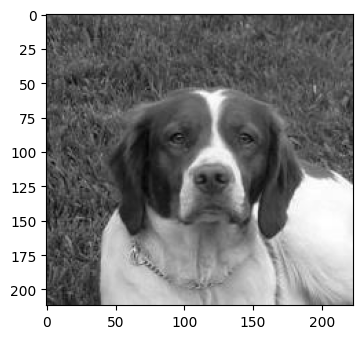

In [29]:
plt.imshow(1/255*img_arr)

(121, 109)


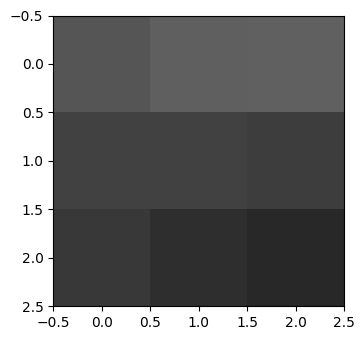

In [32]:
n = 0
print(arr[index[n]])

plt.imshow(1/255*img_arr[arr[index[n]][0]:arr[index[n]][0]+3, arr[index[n]][1]:arr[index[n]][1]+3 ])

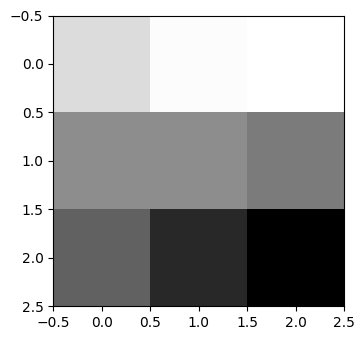

In [38]:
A = np.log(img_arr[arr[index[n]][0]:arr[index[n]][0]+3, arr[index[n]][1]:arr[index[n]][1]+3 ][:,:,0]).flatten()
A = A - np.mean(A)

plt.imshow(A.reshape(3,3))
plt.gray()

In [ ]:
def newvect(P):
    v = np.zeros(9)
    for i in range(3):
        for j in range(3):
            v[3*j+i] = P[i,j]
    return v

#Compute adjacency indices
def I_Dnorm():
    Dict = []
    for i in range(3):
        for j in range(3):
            for k in range(3):
                for l in range(3):
                    if (abs(i -k) + abs(j-l) <= 1):
                        Dict.append((i,j,k,l))
    return Dict

# Compute D-norm of a 3 by 3 array
def computevectDnorm(P):
    sum=0
    Dvect = I_Dnorm()
    for x in Dvect:
        sum+= (P[x[0], x[1]] - P[x[2],x[3]])**2
    return np.sqrt(0.5*sum)

def computeDnorm(P):
    n, m = P.shape
    norm_vect = np.zeros((n,1))
    for i in range(n):
        norm_vect[i,0] = np.sqrt(computevectDnorm(P[i].reshape(3,3)))
    return norm_vect

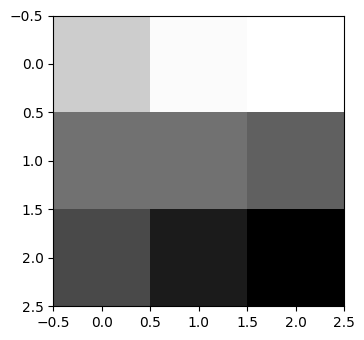

In [34]:
plt.imshow(img_arr[arr[index[n]][0]:arr[index[n]][0]+3, arr[index[n]][1]:arr[index[n]][1]+3 ][:,:,0])
plt.gray()

In [110]:
img_arr[arr[index[n]][0]:arr[index[n]][0]+3, arr[index[n]][1]:arr[index[n]][1]+3][:,:,0]

array([[33., 27., 51.],
       [29., 60., 61.],
       [56., 46., 61.]], dtype=float32)

In [8]:
result = dense_sort_data(100, 40, 50)

In [47]:
import pickle
# List of relevant 3x3 features in "hyena-like animals"
outfilez = open('patches_gray_30.pckl', 'wb')
pickle.dump(array, outfilez)
outfilez.close()

In [2]:
import pickle
with open('patches_gray_nsort.pckl', 'rb') as handle:
    Q= pickle.load(handle)

In [40]:
import pickle
with open('patches_gray_10.pckl', 'rb') as handle:
    P= pickle.load(handle)
A = list(P)
B = list(Q)
A.extend(B)

In [43]:
array = np.asarray(A)

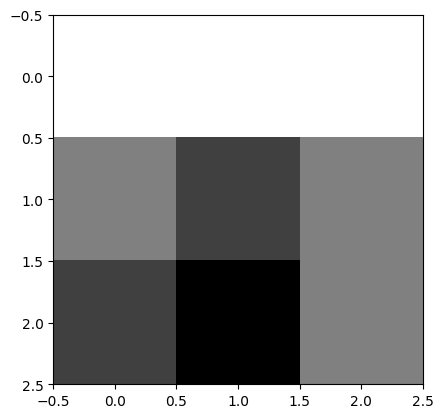

In [38]:
def viz(data):
    result = np.zeros(shape=(3,3,3))
    result[:,:,0] = data.reshape(3,3)
    result[:,:,1] = data.reshape(3,3)
    result[:,:,2] = data.reshape(3,3)
    return result

n = 5500
#plt.imshow(1/255*viz(Q[n]))
plt.imshow(1/255*viz(Q[n])[:,:,0])
#plt.gray()

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import math
from sklearn.manifold import Isomap
from numpy.linalg import norm
from ripser import ripser
from persim import plot_diagrams
import warnings
warnings.filterwarnings('ignore')

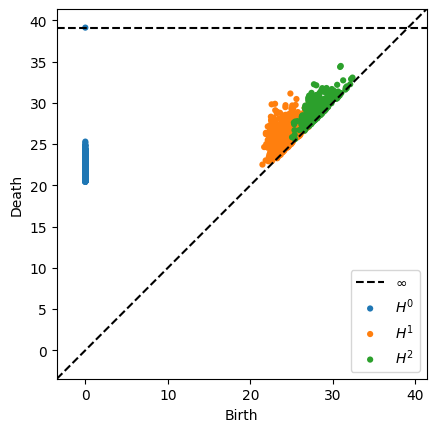

In [182]:
ripser_out_z2 = ripser(resultz[0:math.ceil(0.5*len(resultz))], coeff=2, do_cocycles = True, maxdim = 2, n_perm = 600)
dgmsz2 = ripser_out_z2['dgms']
plot_diagrams(dgmsz2, labels = ["$H^0$", "$H^1$", "$H^2$", "$H^3$"])
#plt.title("$\mathbb{Z}_{11}$ Coefficient")
#plt.savefig("Z00.png")

In [ ]:
ripser_out_z2 = ripser(resultz[0:math.ceil(0.5*len(resultz))], coeff=2, do_cocycles = True, maxdim = 2, n_perm = 600)
dgmsz2 = ripser_out_z2['dgms']
plot_diagrams(dgmsz2, labels = ["$H^0$", "$H^1$", "$H^2$", "$H^3$"])
#plt.title("$\mathbb{Z}_{11}$ Coefficient")
#plt.savefig("Z00.png")

In [52]:
len(resultz)

84862

In [23]:
ripser_out_z2 = ripser(P, coeff=2, do_cocycles = True, maxdim = 2, n_perm = 600)
dgmsz2 = ripser_out_z2['dgms']
plot_diagrams(dgmsz2, labels = ["$H^0$", "$H^1$", "$H^2$", "$H^3$"])
#plt.title("$\mathbb{Z}_{11}$ Coefficient")
#plt.savefig("Z00.png")

NameError: name 'P' is not defined

In [50]:
A = np.exp(1)
A

2.718281828459045

In [4]:
import skdim
import numpy as np
import math

In [5]:
#danco = skdim.id.DANCo().fit(Q)
#lpca = skdim.id.lPCA(Q)
lpca = skdim.id.lPCA().fit_pw(Q[:math.ceil(0.2*len(Q))], n_neighbors=9, n_jobs= 1)
A = lpca.dimension_pw_


In [6]:
np.mean(A)

4.282877316857899

In [36]:
len(A)

7647

In [1]:
from numpy.linalg import norm
import pickle
with open('patches_gray_sort.pckl', 'rb') as handle:
    P= pickle.load(handle)

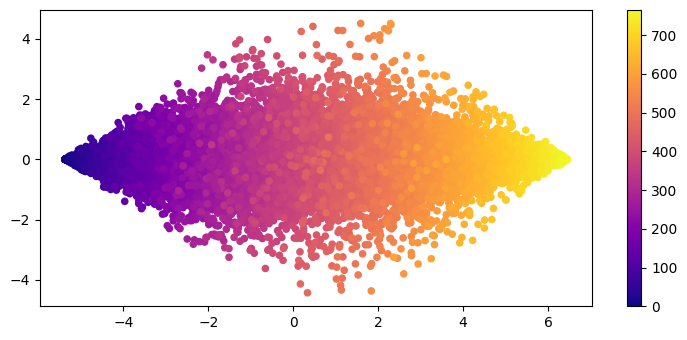

In [2]:

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from numpy.linalg import norm
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True


pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(P)
y = norm(P, axis=1)


f, ax = plt.subplots()

points = ax.scatter(Xt[:,0], Xt[:,1], c=y, s=20, cmap="plasma")
f.colorbar(points)

plt.show()

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from numpy.linalg import norm
import plotly.express as px
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(P)


fig = px.scatter_3d(None, 
                    x=Xt[:,0], y=Xt[:,1], z=Xt[:,2],
                    color=list(norm(P, axis= 1)),
                    height=900, width=900
                   )

# Update chart looks
fig.update_layout(#title_text="Scatter 3D Plot",
                  showlegend=True,
                  legend=dict(orientation="h", yanchor="top", y=0, xanchor="center", x=0.5),
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                        center=dict(x=0, y=0, z=-0.2),
                                        eye=dict(x=-1.5, y=1.5, z=0.5)),
                                        margin=dict(l=0, r=0, b=0, t=0),
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         ),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                          ),
                               zaxis=dict(backgroundcolor='lightgrey',
                                          color='black', 
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         )))

# Update marker size
fig.update_traces(marker=dict(size=2))

fig.show()

NameError: name 'px' is not defined

In [12]:
import pandas as pd # for data manipulation

# Visualization
import plotly.express as px # for data visualization
import matplotlib.pyplot as plt # for showing handwritten digits

import math

# Skleran
from sklearn.datasets import load_digits # for MNIST data
from sklearn.manifold import Isomap # for Isomap dimensionality reduction



embed3 = Isomap(
    n_neighbors=20, # default=5, algorithm finds local structures based on the nearest neighbors
    n_components=3, # number of dimensions
    eigen_solver='auto', # {‘auto’, ‘arpack’, ‘dense’}, default=’auto’
    tol=0, # default=0, Convergence tolerance passed to arpack or lobpcg. not used if eigen_solver == ‘dense’.
    max_iter=None, # default=None, Maximum number of iterations for the arpack solver. not used if eigen_solver == ‘dense’.
    path_method='auto', # {‘auto’, ‘FW’, ‘D’}, default=’auto’, Method to use in finding shortest path.
    neighbors_algorithm='auto', # neighbors_algorithm{‘auto’, ‘brute’, ‘kd_tree’, ‘ball_tree’}, default=’auto’
    n_jobs=-1, # n_jobsint or None, default=None, The number of parallel jobs to run. -1 means using all processors
    metric='minkowski', # string, or callable, default=”minkowski”
    p=2, # default=2, Parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2
    metric_params=None # default=None, Additional keyword arguments for the metric function.
)

### Step 2 - Fit the data and transform it, so we have 3 dimensions instead of 64
P_trans3 = embed3.fit_transform(P[0:math.ceil(10/100*len(P))])
    
### Step 3 - Print shape to test
print('The new shape of P: ',P_trans3.shape)

The new shape of P:  (8487, 3)


In [20]:
# Create a 3D scatter plot

fig = px.scatter_3d(None, 
                    x=P_trans3[:,0], y=P_trans3[:,1], z=P_trans3[:,2],
                    color=list(norm(P[0:math.ceil(10/100*len(P))], axis= 1)),
                    height=900, width=900
                   )

# Update chart looks
fig.update_layout(#title_text="Scatter 3D Plot",
                  showlegend=True,
                  legend=dict(orientation="h", yanchor="top", y=0, xanchor="center", x=0.5),
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                        center=dict(x=0, y=0, z=-0.2),
                                        eye=dict(x=-1.5, y=1.5, z=0.5)),
                                        margin=dict(l=0, r=0, b=0, t=0),
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         ),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                          ),
                               zaxis=dict(backgroundcolor='lightgrey',
                                          color='black', 
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         )))

# Update marker size
fig.update_traces(marker=dict(size=2))

fig.show()

In [6]:
from sklearn.datasets import load_wine
winedata = load_wine()
X, y = winedata['data'], winedata['target']
print(X.shape)
print(y.shape)

(178, 13)
(178,)


In [11]:
import numpy as np
from numpy.linalg import norm
norm(np.array([[1,2], [5,8]]), axis = 1 )

array([2.23606798, 9.43398113])

In [14]:
import os
path = "/mnt/c/Users/soaba/code/CNN/Test_folder"
dir_list = os.listdir(path)

In [9]:
import os
#current_directory = os.getcwd()
final_directory = os.path.join("/mnt/c/Users/soaba/code/CNN/data_folders", folder)
if not os.path.exists(final_directory):
   os.makedirs(final_directory)

In [1]:
import numpy as np

from PIL import Image
from numpy import asarray
import math
import os
from tensorflow import keras
from tensorflow.keras.preprocessing import image 


2023-05-27 19:59:22.643982: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-27 19:59:23.565507: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-27 19:59:23.565674: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-05-27 19:59:25.540822: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [3]:

def convert_to_gray(img_path):
    
    img_ = Image.open(img_path)
    num_img = asarray(img_)
    

    
    img = image.load_img(img_path, target_size=(num_img.shape[0], num_img.shape[1]))
    x = image.img_to_array(img)

    x_gray = 0.299*x[:,:,0] + 0.587*x[:,:,1] + 0.114*x[:,:,2]

    x_gray3d = np.zeros(shape = (num_img.shape[0], num_img.shape[1], 3))
    x_gray3d[:,:,0] = x_gray
    x_gray3d[:,:,1] = x_gray
    x_gray3d[:,:,2] = x_gray

    gray_img = keras.preprocessing.image.array_to_img(x_gray3d)
    #gray_img.save("gray_image1.jpg")


    return gray_img






def convert_folder_to_gray():
    path = "/mnt/c/Users/soaba/code/CNN/self_driving_data/IMG"
    path1 = "/mnt/c/Users/soaba/code/CNN/self_driving_data_gray"
    dir_list = os.listdir(path)

    # create a _gray folder in data_folders_gray
    #for folder in dir_list[:4]:
    #folder_dir_list = os.listdir(path+"/"+folder)
    
        #n = len(folder_dir_list)
    #final_directory = os.path.join(path1, folder +"_gray")
    #if not os.path.exists(final_directory):
     #   os.makedirs(final_directory)
    for x in dir_list[2:]:

        gray_img = convert_to_gray(path + '/'+ x)
        gray_img.save(path1  +"/" +x)



In [4]:
convert_folder_to_gray()